In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#load gdp data

gdp_df = pd.read_csv("GDP_PCT.csv", header=0, parse_dates=['DATE'])
gdp_df = gdp_df.set_index('DATE')

In [3]:
gdp_df

,GDP
DATE,
1947-04-01,4.7
1947-07-01,6.0
1947-10-01,17.3
1948-01-01,9.6
1948-04-01,10.7
...,...
2018-07-01,4.8
2018-10-01,2.9
2019-01-01,3.9


In [4]:
#load nber recession dates data

nber_df = pd.read_csv("USRECQ.csv", header=0, parse_dates=['DATE'])
nber_df = nber_df.set_index('DATE')

In [5]:
nber_df

,USRECQ
DATE,
1854-10-01,1
1855-01-01,0
1855-04-01,0
1855-07-01,0
1855-10-01,0
...,...
2018-07-01,0
2018-10-01,0
2019-01-01,0


In [6]:
# limiting nber data to after 1947 since thats when gdp data starts

nber_df = nber_df[(nber_df.index.year >= 1947)]
nber_df = nber_df.iloc[1:]

In [7]:
nber_df.head()

,USRECQ
DATE,
1947-04-01,0
1947-07-01,0
1947-10-01,0
1948-01-01,0
1948-04-01,0


In [8]:
# combine gdp and nber data into one single dataframe

new_df = pd.DataFrame(
    np.concatenate([gdp_df, nber_df], axis=1), 
    columns=['GDP_PCT', 'NBER'],
    index=nber_df.index
    )

In [9]:
new_df

,GDP_PCT,NBER
DATE,,
1947-04-01,4.7,0.0
1947-07-01,6.0,0.0
1947-10-01,17.3,0.0
1948-01-01,9.6,0.0
1948-04-01,10.7,0.0
...,...,...
2018-07-01,4.8,0.0
2018-10-01,2.9,0.0
2019-01-01,3.9,0.0


In [10]:

# define recession data as whenever nber column equals 1 (which indicates a recession)
rec_df = new_df.loc[new_df['NBER'] == 1]

# define expansion data as whenever nber column equals 0 (which indicates an expansion)
exp_df = new_df.loc[new_df['NBER'] == 0]

# removing nber column as it is now unnecessary
rec_df.drop(columns=['NBER'], inplace=True)
exp_df.drop(columns=['NBER'], inplace=True)

C:\Miniconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
rec_df

,GDP_PCT
DATE,
1949-01-01,-7.4
1949-04-01,-5.2
1949-07-01,2.3
1949-10-01,-3.3
1953-07-01,-0.6
1953-10-01,-5.2
1954-01-01,-0.6
1954-04-01,0.8
1957-10-01,-3.8


In [12]:
exp_df

,GDP_PCT
DATE,
1947-04-01,4.7
1947-07-01,6.0
1947-10-01,17.3
1948-01-01,9.6
1948-04-01,10.7
...,...
2018-07-01,4.8
2018-10-01,2.9
2019-01-01,3.9


In [13]:
#define function for getting recession probabilities
#function is based on the Dating Business Cycle Turning Points paper, Chauvet and Hamilton (2005)

def get_probability_of_recession(gdp_growth):
    
    x_value = np.linspace(gdp_growth,gdp_growth, 1)
    
    rec_mu, rec_std = norm.fit(rec_df.values)
    exp_mu, exp_std = norm.fit(exp_df.values)
    
    rec_p = norm.pdf(x_value, rec_mu, rec_std) * 0.2
    exp_p = norm.pdf(x_value, exp_mu, exp_std) * 0.8
    mix_p = rec_p + exp_p
    
    prob = (rec_p / mix_p)[0] * 100
    
    return prob

In [14]:
#loading the gdp data with predicted values for 2019 Q3 - 2021 Q2
final_gdp_df = pd.read_csv("final_gdp_pct.csv", header=0, parse_dates=['DATE'])
final_gdp_df = final_gdp_df.set_index('DATE')

In [15]:
#loading the gdp based recession index dataset
rec_prob_df = pd.read_csv("REC_INDEX.csv", header=0, parse_dates=['DATE'])
rec_prob_df = rec_prob_df.set_index('DATE')

In [16]:
# copying rec_prob_df to final_prob_df, which we will be adding to.
final_prob_df = rec_prob_df

In [17]:
final_prob_df

,REC_INDEX
DATE,
1967-10-01,3.8348
1968-01-01,1.7614
1968-04-01,1.2127
1968-07-01,2.3009
1968-10-01,6.3338
...,...
2018-04-01,1.1000
2018-07-01,1.5000
2018-10-01,2.4000


In [18]:
# get last 10 values of final_gdp_df
final_gdp_df.tail(10)

,GDP
DATE,
2019-01-01,3.900000
2019-04-01,4.700000
2019-07-01,3.800000
2019-10-01,-18.488588
2020-01-01,17.337566
2020-04-01,-9.270814
2020-07-01,17.026945
2020-10-01,-9.446802
2021-01-01,1.917489


In [19]:
#last 8 values of final_gdp_df are the  values for 2019 Q3 to 2021 Q2

#for loop converts the last 8 gdp values to recession probabilities using the get_probability_of_recession function
# ... and adds those values to the recession index dataset
for i in range(0, 8):
    probability = get_probability_of_recession(gdp_growth=final_gdp_df[-8:].values[i])[0]
    final_prob_df = final_prob_df.append({'REC_INDEX': probability}, ignore_index=True)
    
final_prob_df.index = pd.to_datetime(rec_prob_df.index.append(pd.Index(["2019-07-01", "2019-10-01", "2020-01-01", "2020-04-01", "2020-07-01", "2020-10-01", "2021-01-01", "2021-04-01"])))

In [20]:
#get last 10 values of final_prob_df
final_prob_df.tail(10)

,REC_INDEX
2019-01-01,2.900000
2019-04-01,3.900000
2019-07-01,21.990390
2019-10-01,99.984529
2020-01-01,1.293377
2020-04-01,97.954869
2020-07-01,1.351767
2020-10-01,98.115993
2021-01-01,34.114781
2021-04-01,35.728575


In [21]:
# Seems that between 2019 Q4 and 2020 Q4, 
# recession probabilities are unstable and has outliers due to unstable economy.
# After 2020 Q4, it seems that the recession ends since: 
# the recession probabilities are under 67% for two consecutive quarters.
# Therefore, disregarding those values (2021 Q1 and Q2)...
# and interpolating the data for quarters (2019 Q4 to 2020 Q4) seems like the best option to 
# get rid of the outliers and make data more smooth.

In [22]:
# deleting (2019 Q4 to 2020 Q3) so that we can interpolate
final_prob_df.iloc[-7:-3,] = float('nan')

In [23]:
# (2019 Q4 to 2020 Q3) is now empty
final_prob_df.tail(10)

,REC_INDEX
2019-01-01,2.900000
2019-04-01,3.900000
2019-07-01,21.990390
2019-10-01,NaN
2020-01-01,NaN
2020-04-01,NaN
2020-07-01,NaN
2020-10-01,98.115993
2021-01-01,34.114781
2021-04-01,35.728575


In [24]:
#interpolate through those nan values
final_prob_df = final_prob_df.interpolate()

In [25]:
#see final interpolated values
final_prob_df.tail(10)

,REC_INDEX
2019-01-01,2.900000
2019-04-01,3.900000
2019-07-01,21.990390
2019-10-01,37.215511
2020-01-01,52.440631
2020-04-01,67.665752
2020-07-01,82.890872
2020-10-01,98.115993
2021-01-01,34.114781
2021-04-01,35.728575


In [26]:
#changing index name to DATE
final_prob_df.index.name = "DATE"

In [39]:
final_prob_df.tail(10)

,REC_INDEX
DATE,
2019-01-01,2.900000
2019-04-01,3.900000
2019-07-01,21.990390
2019-10-01,37.215511
2020-01-01,52.440631
2020-04-01,67.665752
2020-07-01,82.890872
2020-10-01,98.115993
2021-01-01,34.114781


In [28]:
#save final_prob_df data as final_rec_prob.csv file
final_prob_df.to_csv('final_rec_prob.csv')

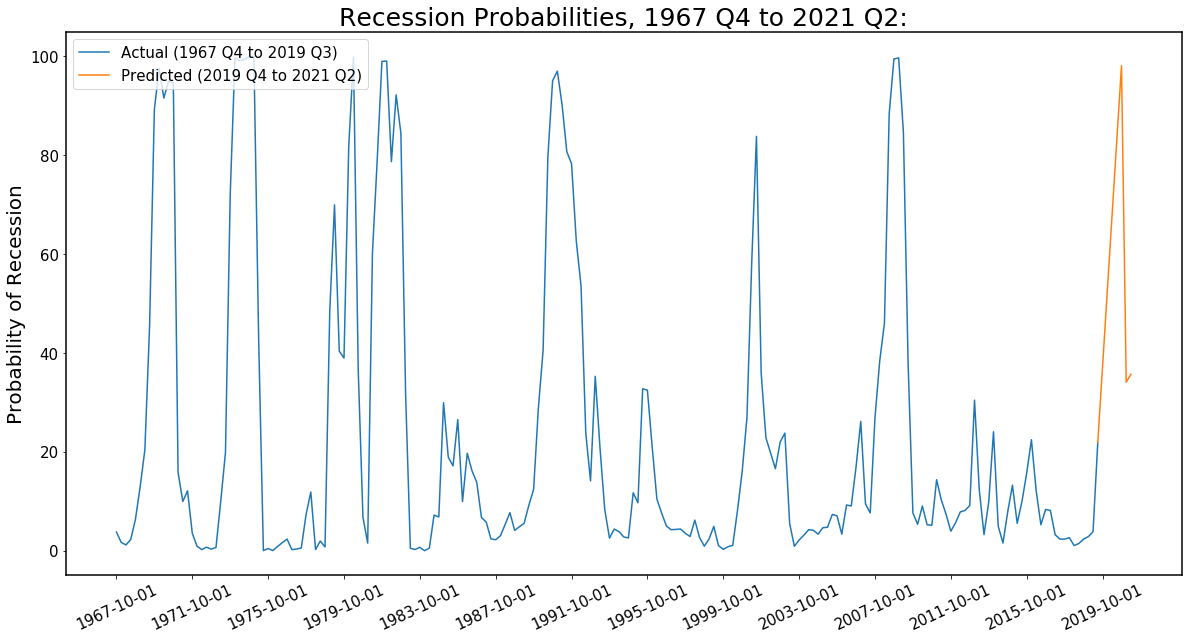

In [82]:
plt.rcParams['axes.linewidth'] = 1.5

plt.figure(figsize=(20,10))
plt.plot(final_prob_df.reset_index().index.values[:-7], final_prob_df['REC_INDEX'][:-7], label="Actual (1967 Q4 to 2019 Q3)")
plt.plot(final_prob_df.reset_index().index.values[-8:], final_prob_df['REC_INDEX'][-8:], label="Predicted (2019 Q4 to 2021 Q2)")

plt.xticks(np.arange(0, 215, 16), final_prob_df.index.date[0::16], rotation=25, fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel("Probability of Recession", fontsize=20)

plt.legend(loc='upper left', fontsize=15)
plt.title("Recession Probabilities, 1967 Q4 to 2021 Q2:", fontsize=25)

plt.savefig('final_recession_probabilities.png', dpi=80, bbox_inches='tight', pad_inches=0.1)
plt.show()